In [81]:
import sys
import os
import importlib

# Add parent directory to sys path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

In [82]:
import pandas as pd
import numpy as np

from pathlib import Path

In [83]:
import jcds.eda as jq
import jcds.charts as jc

In [84]:
# Jupyter magic allows modules to reload automatically
%load_ext autoreload 

# '2' autoreload modules when used by a cell
%autoreload 2 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [85]:
datasets = Path("./datasets")

tayko = "Tayko.csv"
toyota = "ToyotaCorolla.csv"
accidents_clean = "accidents_clean_train.csv"
accidents = "accidents.csv"
df = pd.read_csv(datasets / accidents)

In [86]:
df.head()

,Number_of_vehicles_involved,Number_of_casualties,Fatality
0,2,2,0
1,2,2,0
2,2,2,0
3,2,2,0
4,2,2,0


In [87]:
jq.quick_report(df)

Quick Report - info(memory_usage='deep')
Total cols: 3
Rows missing all values: 0 (0.0%)
Total Rows: 8210
Cols with missing values: 0 (0.0%)
Total missing values in dataset: 0
Categorical features: 0
Continuous features: 3
- Number_of_vehicles_involved: 6 unique values
- Number_of_casualties: 8 unique values
- Fatality: 2 unique values


In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

In [89]:
X = df.drop(columns=["Fatality"])
y = df["Fatality"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=42)

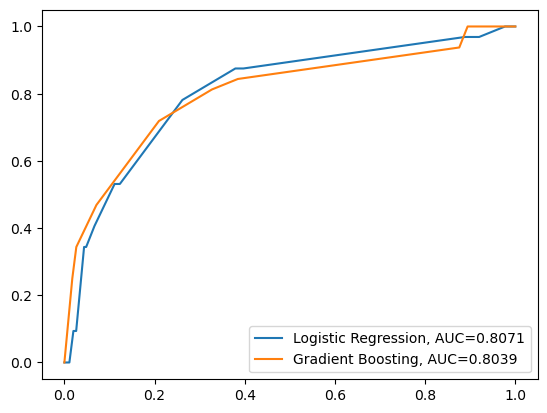

In [90]:
plt.figure(0).clf()

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict_proba(X_val)[:, 1]
# fpr, tpr, label = jc.plot_roc(y_val, y_pred, "Logistic Regression")
jc.plot_roc(y_val, y_pred, "Logistic Regression")
# print(label)
# plt.plot(fpr, tpr, label=label)


gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict_proba(X_val)[:, 1]
jc.plot_roc(y_val, y_pred, "Gradient Boosting")
plt.legend()
plt.show()